[View in Colaboratory](https://colab.research.google.com/github/peaelle42/DNN_jump_start/blob/master/JS03_02_Getting_slightly_more_advanced_.ipynb)

## Testing for GPU

To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU
 

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 2. Getting slightly more advanced


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow.python.keras
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras import backend as K

import tensorflow as tf
import numpy as np

In [3]:
print(tf.keras.__version__)
print(tf.__version__)

2.1.6-tf
1.9.0-rc2


### Lets import our dataset

In [0]:
from tensorflow.python.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[0]

(60000, 784) train samples
(10000, 784) test samples


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Setting up our Network Hyper Parameters

In [0]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

### This time we are going to make a functional model instead of a sequential model

In [0]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_4")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [0]:
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(Inp, output)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total params: 361,150
Trainable params: 361,150
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [0]:
#Settting the learning rate
K.set_value(model.optimizer.lr, learning_rate)

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.4144 - acc: 0.8749 - val_loss: 0.1822 - val_acc: 0.9434
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.1401 - acc: 0.9581 - val_loss: 0.1147 - val_acc: 0.9646
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0950 - acc: 0.9716 - val_loss: 0.1068 - val_acc: 0.9659
Epoch 4/10
51300/60000 [========================>.....] - ETA: 0s - loss: 0.0705 - acc: 0.9796

60000/60000 [==============================] - 4s 67us/step - loss: 0.0713 - acc: 0.9791 - val_loss: 0.0938 - val_acc: 0.9707
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0530 - acc: 0.9840 - val_loss: 0.1006 - val_acc: 0.9694
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0420 - acc: 0.9872 - val_loss: 0.0769 - val_acc: 0.9776
Epoch 7/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0323 - acc: 0.9904 - val_loss: 0.0755 - val_acc: 0.9795
Epoch 8/10
30100/60000 [==============>...............] - ETA: 1s - loss: 0.0221 - acc: 0.9940

60000/60000 [==============================] - 4s 65us/step - loss: 0.0249 - acc: 0.9928 - val_loss: 0.0873 - val_acc: 0.9731
Epoch 9/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0719 - val_acc: 0.9799
Epoch 10/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0166 - acc: 0.9951 - val_loss: 0.0695 - val_acc: 0.9806


In [0]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

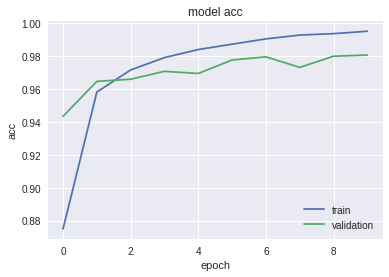

In [14]:
plot_train(history)

Now lets add dropput

Dropout(0.3) = randomly dropout 30% of the units each pass through

In [0]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [0]:
model = Model(Inp, output)

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.4246 - acc: 0.5541 - val_loss: 0.5463 - val_acc: 0.8550
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.6285 - acc: 0.8086 - val_loss: 0.3657 - val_acc: 0.8983
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.4879 - acc: 0.8539 - val_loss: 0.3095 - val_acc: 0.9120
Epoch 4/10
47700/60000 [======================>.......] - ETA: 0s - loss: 0.4214 - acc: 0.8762

60000/60000 [==============================] - 4s 73us/step - loss: 0.4177 - acc: 0.8770 - val_loss: 0.2726 - val_acc: 0.9207
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3723 - acc: 0.8911 - val_loss: 0.2440 - val_acc: 0.9296
Epoch 6/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3398 - acc: 0.9009 - val_loss: 0.2256 - val_acc: 0.9342
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.3110 - acc: 0.9085 - val_loss: 0.2065 - val_acc: 0.9404
Epoch 8/10
 6100/60000 [==>...........................] - ETA: 3s - loss: 0.2981 - acc: 0.9087

60000/60000 [==============================] - 5s 80us/step - loss: 0.2868 - acc: 0.9157 - val_loss: 0.1933 - val_acc: 0.9428
Epoch 9/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2670 - acc: 0.9218 - val_loss: 0.1818 - val_acc: 0.9464
Epoch 10/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.2530 - acc: 0.9258 - val_loss: 0.1707 - val_acc: 0.9496


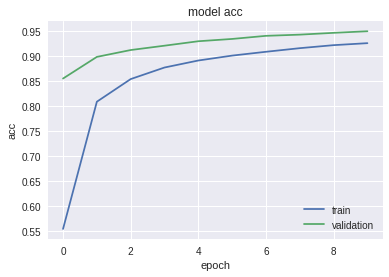

In [20]:
plot_train(history)

In [21]:
model.predict(x_test[0:4])

array([[4.4451775e-05, 1.1214480e-05, 2.9458929e-04, 6.2117627e-04,
        1.0339596e-06, 3.9710671e-06, 1.4541791e-07, 9.9829072e-01,
        8.0294076e-06, 7.2473136e-04],
       [8.2638330e-04, 6.3439336e-05, 9.9041116e-01, 4.0328098e-03,
        1.6102048e-07, 3.9424261e-04, 2.5784010e-03, 1.7029720e-06,
        1.6909003e-03, 7.1049226e-07],
       [4.4573562e-06, 9.9471408e-01, 1.6029248e-03, 6.6672766e-04,
        2.8322742e-04, 6.2886298e-05, 1.9519828e-04, 1.8116548e-03,
        5.2907440e-04, 1.2980732e-04],
       [9.9891555e-01, 1.0959906e-06, 2.7784193e-04, 4.1444797e-05,
        1.2944548e-07, 2.5478832e-04, 2.3587402e-04, 2.3271907e-04,
        9.1557849e-06, 3.1399974e-05]], dtype=float32)

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17069652752503753
Test accuracy: 0.9496


### Build a netowork with at least 7 layers and uses dropout